In [1]:
!pip install pyts

In [1]:
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

%matplotlib inline

In [2]:
gafs_diff = GramianAngularField(method='difference')

In [3]:
def ceated_deactiveimage(data1, data2, folder_name):

    set_date = set()
    temp_power = []
    start = timeit.default_timer()
    data = data1.join(data2.set_index('date'), on = 'date')
    data['power_device']=data['power_device'].fillna(value = data['power_device'].mean())
    data['power_deactive'] = pd.Series([max(0, i) for i in data['power_active']-data['power_device']])
    stop = timeit.default_timer()
    print('create Dataframe ' , stop-start)
    
    start = timeit.default_timer()
    for index in range(len(data)):

        year = data.iloc[index]['year']
        month = data.iloc[index]['month']
        day = data.iloc[index]['day']
            
        
        if index == 0:
            set_date.add(tuple((year,month,day)))
            temp_power.append(data.iloc[index]['power_deactive'])
        
        else:
            if tuple((year,month,day)) not in set_date:
                set_date.add(tuple((year,month,day)))

                #fit transform with gasf
                gafs_power = gafs_diff.fit_transform(np.array(temp_power).reshape((1,-1)))
                #print(gafs_power[0])
                name = str(year) + '-' + str(month) + '-' + str(day) + '.png'
                #create image for this day
                plt.imsave('/Users/gracepichar/Documents/GitHub/Data-Science-project/OFF/'+ folder_name +'\\' + name, gafs_power[0] , cmap='gray')

                #create new list for power series
                temp_power = []
                temp_power.append(data.iloc[index]['power_deactive'])

            else:
                temp_power.append(data.iloc[index]['power_deactive'])
        
    if (index+1)%1000000==0:
        stop = timeit.default_timer()
        print('iteration ' + str(index+1) + ' :', stop-start)
        start = timeit.default_timer()


In [4]:

folder_names = ['OFF_WasherDryer']
file_name = ['washerdryer_building1']
for j in [0]:
    ukdale_building1 = pd.read_csv('ukdale_building1.csv')
    ukdale_building1.drop('Unnamed: 0', axis=1, inplace=True)
    washerdryer_building1 =  pd.read_csv('/Users/gracepichar/Downloads/' + file_name[j] + '.csv')
    washerdryer_building1.drop('Unnamed: 0', axis=1, inplace=True)
    ceated_deactiveimage(ukdale_building1, washerdryer_building1, folder_names[j])

create Dataframe  75.7137466


In [4]:
import os
path = '/Users/gracepichar/Documents/GitHub/Data-Science-project/OFF_WasherDryer'
files = os.listdir(path)
len(files)

1629

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image 
from PIL import Image, ImageOps
Image.MAX_IMAGE_PIXELS = 1000000000

In [6]:
for image_file in files:
    if image_file[-4:] == '.png':
        image = Image.open(path + image_file)
        resize = image.resize((224, 224))
        #gray_scale = ImageOps.grayscale(resize)
        resize.save('/Users/gracepichar/Documents/GitHub/Data-Science-project/OFF_WasherDryer_reshape'+ image_file)
    else:
        pass

# Apply Singular value decomposition (SVD)

* washer drayer

Compute top k variance

variance Explained by Top 20 singular values:
[9.72586e-01 2.53490e-02 2.06000e-03 1.00000e-06 1.00000e-06 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00]


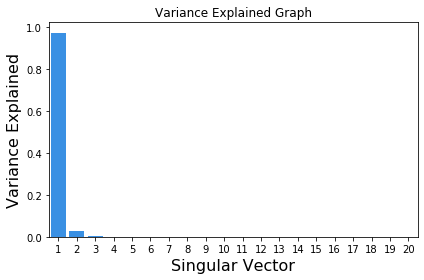

In [10]:
img = Image.open('/Users/gracepichar/Documents/GitHub/Data-Science-project/OFF-process/OFF_WasherDryer_reshape/2012-11-28.png')
imggray = img.convert('LA')

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray .size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

U, sigma, V = np.linalg.svd(imgmat)
var_explained = np.round(sigma**2/np.sum(sigma**2), decimals=6)
 
# Variance explained top Singular vectors
print(f'variance Explained by Top 20 singular values:\n{var_explained[0:20]}')
 
sns.barplot(x=list(range(1, 21)),
            y=var_explained[0:20], color="dodgerblue")
 
plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.show()


In [4]:
import os

In [15]:
path_resize_washer = '/Users/gracepichar/Documents/GitHub/Data-Science-project/OFF-process/OFF_WasherDryer_reshape/'
files_resize_washer = os.listdir(path_resize_washer)

In [16]:
for image_file in files_resize_washer:
    if image_file[-4:] == '.png':
        image = Image.open(path_resize_washer + image_file)
        imggray = image.convert('LA')
        imgmat = np.array(list(imggray.getdata(band=0)), float)
        imgmat.shape = (imggray .size[1], imggray.size[0])
        imgmat = np.matrix(imgmat)
        U, sigma, V = np.linalg.svd(imgmat)
        reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
        plt.imsave('/Users/gracepichar/Documents/GitHub/Data-Science-project/SVD/OFF-SVD/washer-SVD/'+ image_file + '.png', reconstimg, cmap = 'gray')
    else:
        pass

* fridge

variance Explained by Top 20 singular values:
[9.95175e-01 4.82300e-03 1.00000e-06 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00]


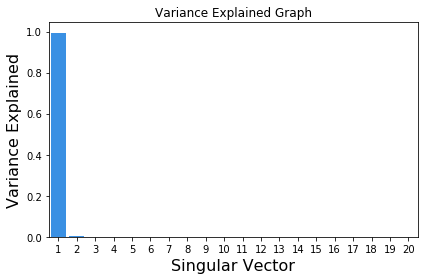

In [21]:
img = Image.open('/Users/gracepichar/Documents/GitHub/Data-Science-project/OFF-process/OFF_Fridge_reshape/2012-11-27.png')
imggray = img.convert('LA')

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray .size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

U, sigma, V = np.linalg.svd(imgmat)
var_explained = np.round(sigma**2/np.sum(sigma**2), decimals=6)
 
# Variance explained top Singular vectors
print(f'variance Explained by Top 20 singular values:\n{var_explained[0:20]}')
 
sns.barplot(x=list(range(1, 21)),
            y=var_explained[0:20], color="dodgerblue")
 
plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.show()


In [5]:
path_resize_fridge = '/Users/gracepichar/Documents/GitHub/Data-Science-project/OFF-process/OFF_Fridge_reshape/'
files_resize_fridge = os.listdir(path_resize_fridge)

In [6]:
for image_file in files_resize_fridge:
    if image_file[-4:] == '.png':
        image = Image.open(path_resize_fridge + image_file)
        imggray = image.convert('LA')
        imgmat = np.array(list(imggray.getdata(band=0)), float)
        imgmat.shape = (imggray .size[1], imggray.size[0])
        imgmat = np.matrix(imgmat)
        U, sigma, V = np.linalg.svd(imgmat)
        reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
        plt.imsave('/Users/gracepichar/Documents/GitHub/Data-Science-project/SVD/OFF-SVD/fridge-SVD/'+ image_file + '.png', reconstimg, cmap = 'gray')
    else:
        pass